In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df = pd.read_csv('/content/gurgaon_properties_outlier_treated.csv')

In [6]:
df.head()

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,...,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score,area_room_ratio
0,flat,signature global park 4,sector 36,0.82,7586.0,1081.0,Super Built up area 1081(100.43 sq.m.)Carpet a...,3.0,2.0,2,...,NaN,650.0,0.0,0.0,0.0,0.0,0.0,0.0,8.0,360.333333
1,flat,smart world gems,sector 89,0.95,8597.0,1105.0,Carpet area: 1103 (102.47 sq.m.),2.0,2.0,2,...,NaN,1103.0,1.0,1.0,0.0,0.0,0.0,0.0,38.0,552.500000
2,flat,breez global hill view,sohna road,0.32,5470.0,585.0,Built Up area: 1000 (92.9 sq.m.)Carpet area: 5...,2.0,2.0,1,...,1000.0,585.0,0.0,0.0,0.0,0.0,0.0,0.0,49.0,292.500000
3,flat,bestech park view sanskruti,sector 92,1.60,8020.0,1995.0,Super Built up area 1995(185.34 sq.m.)Built Up...,3.0,4.0,3+,...,1615.0,1476.0,0.0,1.0,0.0,0.0,1.0,1.0,174.0,665.000000
4,flat,suncity avenue,sector 102,0.48,9023.0,532.0,Super Built up area 632(58.71 sq.m.)Carpet are...,2.0,2.0,1,...,NaN,532.0,0.0,0.0,1.0,0.0,0.0,0.0,159.0,266.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3555 entries, 0 to 3554
Data columns (total 24 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   property_type        3555 non-null   object 
 1   society              3554 non-null   object 
 2   sector               3555 non-null   object 
 3   price                3555 non-null   float64
 4   price_per_sqft       3555 non-null   float64
 5   area                 3555 non-null   float64
 6   areaWithType         3555 non-null   object 
 7   bedRoom              3555 non-null   float64
 8   bathroom             3555 non-null   float64
 9   balcony              3555 non-null   object 
 10  floorNum             3538 non-null   float64
 11  facing               2544 non-null   object 
 12  agePossession        3555 non-null   object 
 13  super_built_up_area  1875 non-null   float64
 14  built_up_area        1587 non-null   float64
 15  carpet_area          1840 non-null   f

In [9]:
df.isnull().sum()

,0
property_type,0
society,1
sector,0
price,0
price_per_sqft,0
area,0
areaWithType,0
bedRoom,0
bathroom,0
balcony,0


<Axes: xlabel='built_up_area', ylabel='super_built_up_area'>

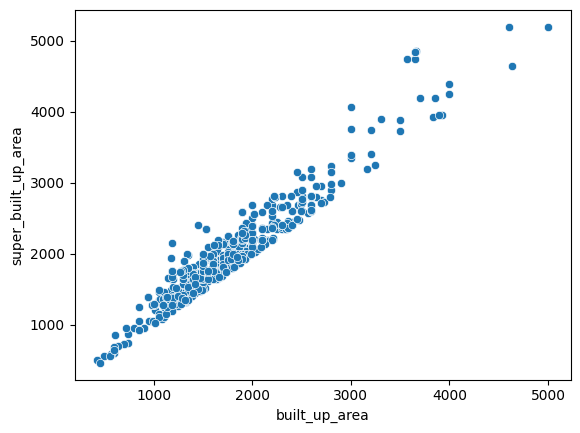

In [11]:
sns.scatterplot(x = df['built_up_area'],y = df['super_built_up_area'])

<Axes: xlabel='built_up_area', ylabel='carpet_area'>

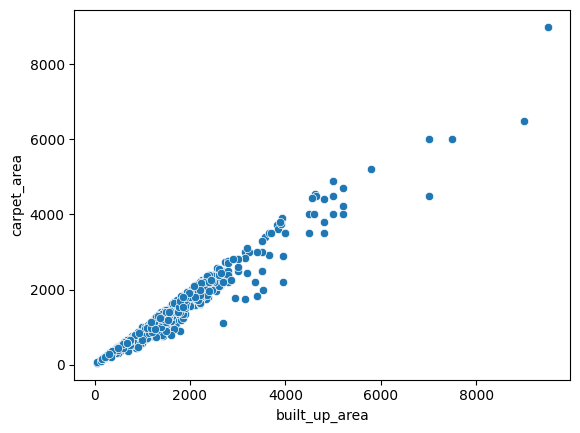

In [12]:
sns.scatterplot(x = df['built_up_area'],y = df['carpet_area'])

you see there is strong relation between built up area and super built up area and carpet area

In [13]:
df[df['built_up_area'].isnull() & df['super_built_up_area'].isnull() & df['carpet_area'].isnull()]

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,...,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score,area_room_ratio


so there are no rows that three are null

In [14]:
all_present_df = df[~((df['super_built_up_area'].isnull()) | (df['built_up_area'].isnull()) | (df['carpet_area'].isnull()))]

In [15]:
super_to_built_up_ratio = (all_present_df['super_built_up_area']/all_present_df['built_up_area']).median()

In [16]:
carpet_to_built_up_ratio = (all_present_df['carpet_area']/all_present_df['built_up_area']).median()

In [17]:
print(super_to_built_up_ratio, carpet_to_built_up_ratio)

1.105263157894737 0.9


so we acn use the ratio to predict the built up area if it is not present and one of two(super_built_up_area,carpet_area) is present

In [18]:
sbc_df = df[~(df['super_built_up_area'].isnull()) & (df['built_up_area'].isnull()) & ~(df['carpet_area'].isnull())]

In [19]:
sbc_df.head()

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,...,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score,area_room_ratio
0,flat,signature global park 4,sector 36,0.82,7586.0,1081.0,Super Built up area 1081(100.43 sq.m.)Carpet a...,3.0,2.0,2,...,NaN,650.0,0.0,0.0,0.0,0.0,0.0,0.0,8.0,360.333333
4,flat,suncity avenue,sector 102,0.48,9023.0,532.0,Super Built up area 632(58.71 sq.m.)Carpet are...,2.0,2.0,1,...,NaN,532.0,0.0,0.0,1.0,0.0,0.0,0.0,159.0,266.000000
38,flat,corona optus,sector 37,1.25,7176.0,1742.0,Super Built up area 1735(161.19 sq.m.)Carpet a...,3.0,3.0,3,...,NaN,1400.0,1.0,0.0,0.0,0.0,0.0,0.0,49.0,580.666667
40,flat,m3m merlin,sector 67,2.80,13679.0,2047.0,Super Built up area 2047(190.17 sq.m.)Carpet a...,3.0,3.0,3,...,NaN,1880.0,0.0,1.0,0.0,0.0,0.0,2.0,26.0,682.333333
45,flat,smart world orchard,sector 61,2.10,13752.0,1527.0,Super Built up area 1549(143.91 sq.m.)Carpet a...,3.0,2.0,3,...,NaN,1500.0,0.0,0.0,0.0,0.0,0.0,0.0,146.0,509.000000


In [20]:
sbc_df['built_up_area'].fillna(round(((sbc_df['super_built_up_area']/1.105) + (sbc_df['carpet_area']/0.9))/2),inplace=True)

/tmp/ipython-input-20-1215074969.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  sbc_df['built_up_area'].fillna(round(((sbc_df['super_built_up_area']/1.105) + (sbc_df['carpet_area']/0.9))/2),inplace=True)
/tmp/ipython-input-20-1215074969.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sbc_df['built_up_area'].fillna(round(((sbc_df['supe

In [21]:
df.update(sbc_df)

In [22]:
sb_df = df[~(df['super_built_up_area'].isnull()) & (df['built_up_area'].isnull()) & (df['carpet_area'].isnull())]

In [23]:
sb_df['built_up_area'].fillna(round(sb_df['super_built_up_area']/1.105),inplace=True)

/tmp/ipython-input-23-1714170073.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  sb_df['built_up_area'].fillna(round(sb_df['super_built_up_area']/1.105),inplace=True)
/tmp/ipython-input-23-1714170073.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sb_df['built_up_area'].fillna(round(sb_df['super_built_up_area']/1.105),inplace=True)


In [24]:
df.update(sb_df)

In [25]:
c_df = df[(df['super_built_up_area'].isnull()) & (df['built_up_area'].isnull()) & ~(df['carpet_area'].isnull())]

In [26]:
c_df['built_up_area'].fillna(round(c_df['carpet_area']/0.9),inplace=True)

/tmp/ipython-input-26-2136919732.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  c_df['built_up_area'].fillna(round(c_df['carpet_area']/0.9),inplace=True)
/tmp/ipython-input-26-2136919732.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  c_df['built_up_area'].fillna(round(c_df['carpet_area']/0.9),inplace=True)


In [27]:
df.update(c_df)

<Axes: xlabel='built_up_area', ylabel='price'>

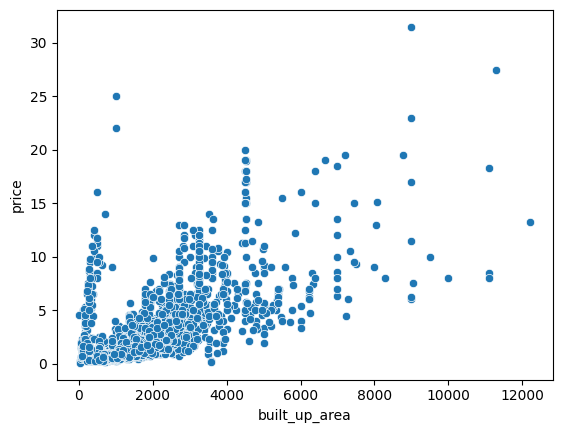

In [29]:
sns.scatterplot(x = df['built_up_area'],y = df['price'])

 now you can see a linear elation btw the area and the price but there are some errors like for small area there is large price

In [30]:
anamoly_df = df[(df['built_up_area'] < 2000) & (df['price'] > 3)][['price','area','built_up_area']]

In [31]:
anamoly_df

,price,area,built_up_area
9,4.50,1350.0,1350.0
35,8.25,2160.0,300.0
41,5.50,1800.0,1800.0
58,5.75,2430.0,260.0
68,7.60,1961.0,1935.0
...,...,...,...
3471,4.25,1620.0,1620.0
3472,9.80,3240.0,300.0
3507,3.90,1174.0,1389.0
3522,3.60,1449.0,1449.0


In [32]:
anamoly_df['built_up_area'] = anamoly_df['area']

In [33]:
df.update(anamoly_df)

<Axes: xlabel='built_up_area', ylabel='price'>

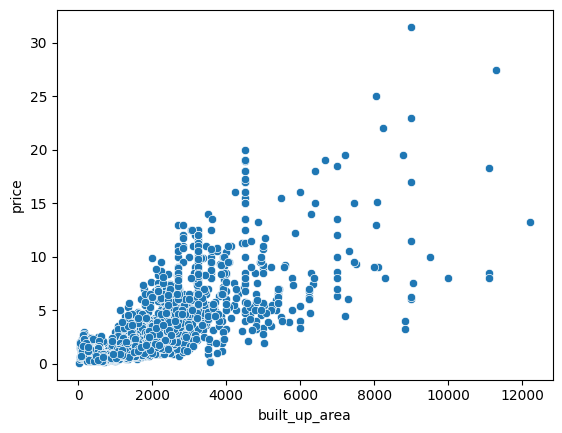

In [34]:
sns.scatterplot(x = df['built_up_area'],y = df['price'])

now our main area col will be super built up area so we can remove the other cols

In [35]:
df.drop(columns=['area','areaWithType','super_built_up_area','carpet_area','area_room_ratio'],inplace=True)

In [40]:
df.isnull().sum()

,0
property_type,0
society,1
sector,0
price,0
price_per_sqft,0
bedRoom,0
bathroom,0
balcony,0
floorNum,0
facing,1011


In [37]:
df[df['floorNum'].isnull()]

,property_type,society,sector,price,price_per_sqft,bedRoom,bathroom,balcony,floorNum,facing,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
500,house,independent,sector 4,0.65,11111.0,4.0,2.0,2,NaN,NaN,Moderately Old,585.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
767,house,independent,sector 7,6.50,15046.0,3.0,2.0,3+,NaN,NaN,Old Property,4320.0,0.0,0.0,0.0,0.0,0.0,0.0,9.0
1294,house,independent,sector 3,1.50,10288.0,3.0,3.0,0,NaN,NaN,Old Property,210.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1452,house,vipul tatvam villa,sector 48,8.50,26235.0,4.0,4.0,1,NaN,NaN,Relatively New,3240.0,0.0,0.0,0.0,0.0,0.0,0.0,21.0
1465,house,ansal sushant lok plots,sector 43,3.30,26570.0,1.0,1.0,0,NaN,NaN,Under Construction,1242.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1946,house,jacob pura,sector 12,0.35,9722.0,2.0,1.0,0,NaN,NaN,Old Property,360.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2048,house,vipul tatvam villa,sector 48,8.50,26235.0,4.0,4.0,2,NaN,East,Moderately Old,3240.0,0.0,1.0,1.0,1.0,0.0,0.0,88.0
2157,house,independent,sector 4,4.12,8889.0,2.0,1.0,3+,NaN,NaN,Moderately Old,4635.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2271,house,emaar mgf marbella,sector 66,9.00,21251.0,4.0,4.0,3+,NaN,South-West,Relatively New,5200.0,0.0,1.0,1.0,1.0,0.0,1.0,114.0
2439,house,dlf new town heights,sector 86,2.47,7719.0,4.0,4.0,3+,NaN,West,Moderately Old,2800.0,0.0,1.0,0.0,1.0,0.0,1.0,130.0


In [38]:
df[df['property_type'] == 'house']['floorNum'].median()

2.0

In [39]:
df['floorNum'].fillna(df[df['property_type'] == 'house']['floorNum'].median(),inplace=True)

/tmp/ipython-input-39-192709820.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['floorNum'].fillna(df[df['property_type'] == 'house']['floorNum'].median(),inplace=True)


In [41]:
df[df['society'].isnull()]

,property_type,society,sector,price,price_per_sqft,bedRoom,bathroom,balcony,floorNum,facing,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
2536,flat,NaN,sector 78,0.6,3692.0,2.0,2.0,0,2.0,NaN,Under Construction,1625.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [42]:
df.drop(index=2536,inplace=True)

there are some values in agepossesion that are undefined we have to fill them

In [43]:
df['agePossession'] = df.groupby(['property_type', 'sector'])['agePossession'].transform(lambda x: x.fillna(x.mode()[0] if not x.mode().empty else None))

In [44]:
df['agePossession'].value_counts()

,count
agePossession,
Relatively New,1605
New Property,557
Moderately Old,545
Old Property,293
Undefined,291
Under Construction,263


In [45]:
def mode_based_imputation(row):
    if row['agePossession'] == 'Undefined':
        mode_value = df[(df['sector'] == row['sector']) & (df['property_type'] == row['property_type'])]['agePossession'].mode()
        # If mode_value is empty (no mode found), return NaN, otherwise return the mode
        if not mode_value.empty:
            return mode_value.iloc[0]
        else:
            return np.nan
    else:
        return row['agePossession']

In [46]:
df['agePossession'] = df.apply(mode_based_imputation,axis=1)

In [47]:
df['agePossession'].value_counts()

,count
agePossession,
Relatively New,1715
New Property,598
Moderately Old,585
Old Property,324
Under Construction,277
Undefined,55


there are still 55 undefined because the sector and propety combo also has mode undefined

In [48]:
def mode_based_imputation(row):
    if row['agePossession'] == 'Undefined':
        mode_value = df[(df['sector'] == row['sector'])]['agePossession'].mode()
        # If mode_value is empty (no mode found), return NaN, otherwise return the mode
        if not mode_value.empty:
            return mode_value.iloc[0]
        else:
            return np.nan
    else:
        return row['agePossession']

In [49]:
df['agePossession'] = df.apply(mode_based_imputation,axis=1)

In [50]:
df['agePossession'].value_counts()

,count
agePossession,
Relatively New,1730
New Property,599
Moderately Old,592
Old Property,327
Under Construction,277
Undefined,29


In [51]:
def mode_based_imputation(row):
    if row['agePossession'] == 'Undefined':
        mode_value = df[(df['property_type'] == row['sector'])]['agePossession'].mode()
        # If mode_value is empty (no mode found), return NaN, otherwise return the mode
        if not mode_value.empty:
            return mode_value.iloc[0]
        else:
            return np.nan
    else:
        return row['agePossession']

In [52]:
df['agePossession'] = df.apply(mode_based_imputation,axis=1)

In [53]:
df['agePossession'].value_counts()

,count
agePossession,
Relatively New,1730
New Property,599
Moderately Old,592
Old Property,327
Under Construction,277
